In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Carregar o CSV
df = pd.read_csv('2022_Passagem.csv',sep = ';', encoding= 'latin1')
df

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,17563956,000002/22-2C,Aéreo,Brasil,Paraná,Londrina,Brasil,Pernambuco,Fernando de Noronha,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"1144,24","0,00",20/12/2021,18:27
1,17563956,000002/22-2C,Aéreo,Brasil,Pernambuco,Fernando de Noronha,Brasil,Paraná,Londrina,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"1529,86","0,00",20/12/2021,18:27
2,17563956,000002/22-2C,Aéreo,Brasil,Pernambuco,Recife,Brasil,Pernambuco,Fernando de Noronha,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"1753,24","0,00",02/09/2021,11:01
3,17563956,000002/22-2C,Aéreo,Brasil,Pernambuco,Fernando de Noronha,Brasil,Pernambuco,Recife,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"2491,86","0,00",02/09/2021,11:01
4,17564009,000001/22-2C,Aéreo,Brasil,Pernambuco,Fernando de Noronha,Brasil,Pernambuco,Recife,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"2491,86","0,00",02/09/2021,10:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272258,2022000982,Sem informação,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Rio de Janeiro,Rio de Janeiro,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"1589,46","0,00",NaN,00:00
272259,2022000985,Sem informação,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,São Paulo,São Paulo,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"2946,83","0,00",NaN,00:00
272260,2022000985,Sem informação,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Rio de Janeiro,Rio de Janeiro,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"2946,83","0,00",NaN,00:00
272261,2022001063,Sem informação,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Minas Gerais,Belo Horizonte,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"539,46","0,00",NaN,00:00


In [31]:
# Informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272263 entries, 0 to 272262
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  272263 non-null  int64 
 1   Número da Proposta (PCDP)            272263 non-null  object
 2   Meio de transporte                   272263 non-null  object
 3   País - Origem ida                    272263 non-null  object
 4   UF - Origem ida                      263571 non-null  object
 5   Cidade - Origem ida                  272263 non-null  object
 6   País - Destino ida                   272263 non-null  object
 7   UF - Destino ida                     261092 non-null  object
 8   Cidade - Destino ida                 272263 non-null  object
 9   País - Origem volta                  272263 non-null  object
 10  UF - Origem volta                    269318 non-null  object
 11  Cidade - Origem volta     

In [32]:
# Substituir a vírgula pelo ponto na coluna 'Valor Passagem'
df['Valor da passagem'] = df['Valor da passagem'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [33]:
# Deletar as colunas que não iremos utilizar
del df['Data da emissão/compra']
del df['Hora da emissão/compra']
del df['Taxa de serviço']
del df['País - Origem volta']
del df['Cidade - Origem volta']
del df['Pais - Destino volta']
del df['UF - Destino volta']
del df['Cidade - Destino volta']

In [34]:
# Tamanho do dataframe
df.shape

(272263, 11)

### Gráficos

In [35]:
# Agrupar o Meio de Transporte
agrupado = df.groupby(['Meio de transporte']).size()
agrupado

Meio de transporte
Aéreo         264923
Fluvial          960
Rodoviário      6380
dtype: int64

<AxesSubplot:xlabel='Meio de transporte'>

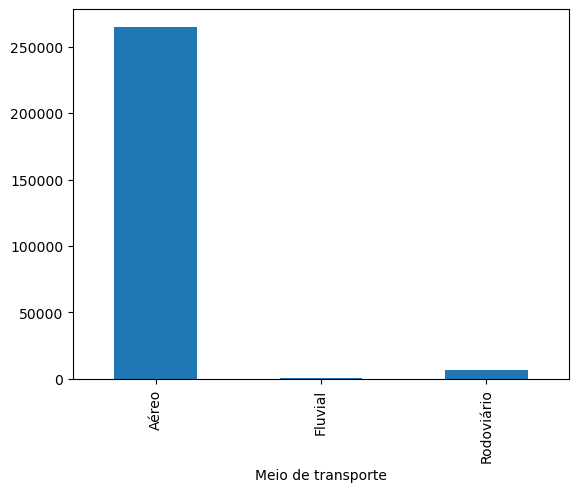

In [36]:
# Gráfico
agrupado.plot.bar(sns.color_palette())

In [37]:
# Agrupar pela UF - Origem Ida
agrupado = df.groupby(['UF - Origem ida']).size().sort_values().tail(3)
agrupado

UF - Origem ida
Rio de Janeiro      27862
São Paulo           28180
Distrito Federal    69143
dtype: int64

[Text(0.5, 1.0, 'Principais Destinos (UF)')]

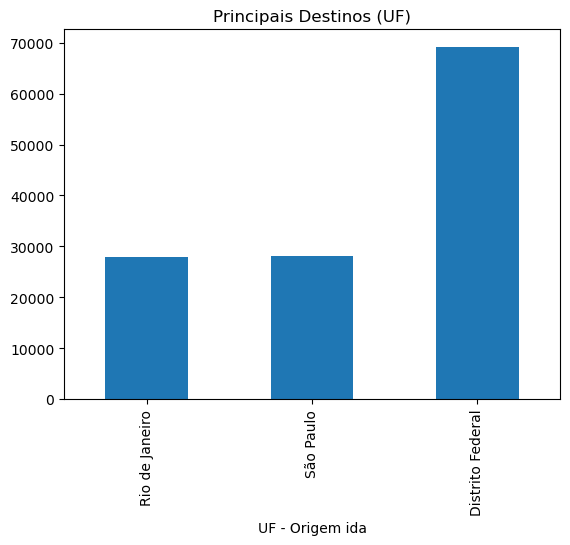

In [38]:
# Gráfico Destinos
agrupado.plot.bar(sns.color_palette()).set(title='Principais Destinos (UF)')

In [39]:
# Agrupar pela UF - Destino Ida
agrupado = df.groupby(['UF - Destino ida']).size().sort_values().tail(3)
agrupado

UF - Destino ida
Rio de Janeiro      26549
São Paulo           29365
Distrito Federal    68504
dtype: int64

[Text(0.5, 1.0, 'Destinos Mais Comuns')]

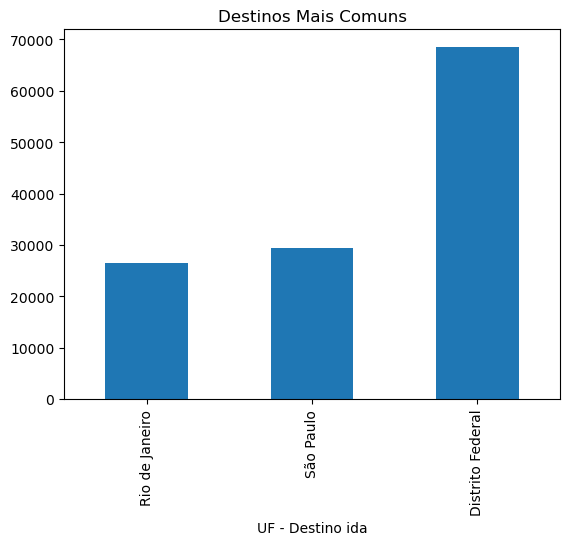

In [40]:
# Gráfico Destino Ida
agrupado.plot.bar(sns.color_palette()).set(title='Destinos Mais Comuns')

<AxesSubplot:xlabel='Valor da passagem', ylabel='Count'>

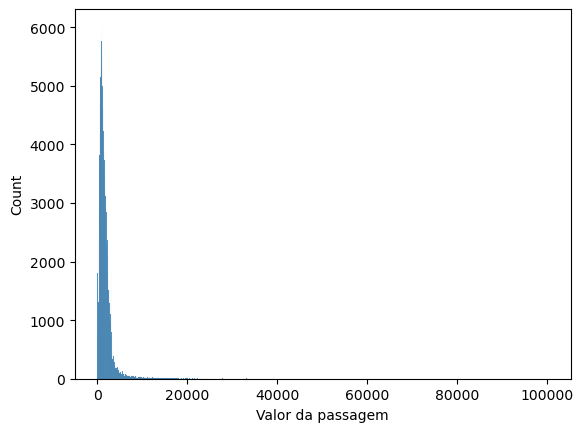

In [41]:
# Histograma do Valor Passagem
sns.histplot(df["Valor da passagem"])

<AxesSubplot:xlabel='Valor da passagem', ylabel='Count'>

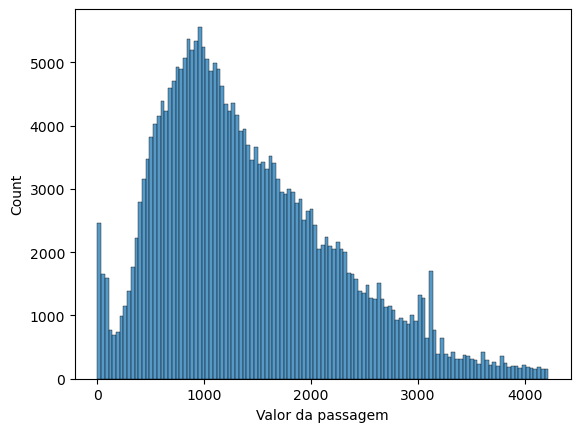

In [42]:
# Filtrar o histograma sem outliers
df_filter = df[df["Valor da passagem"] < df["Valor da passagem"].quantile(.95)]

sns.histplot(df_filter['Valor da passagem'])

In [43]:
# Estatísticas dos valores filtrados
df_filter[['Valor da passagem']].describe()

,Valor da passagem
count,258649.000000
mean,1418.155216
std,826.239905
min,-0.860000
25%,802.470000
50%,1255.230000
75%,1915.930000
max,4221.330000


In [44]:
# Estatísticas dos outliers
df_outliers = df[df["Valor da passagem"] >= df["Valor da passagem"].quantile(.95)]

df_outliers[['Valor da passagem']].describe()

,Valor da passagem
count,13614.000000
mean,8845.135468
std,5989.175659
min,4221.920000
25%,5124.310000
50%,6793.430000
75%,10445.462500
max,100353.470000


In [47]:
# Retirar o Brasil do dataframe
indexNames = df[ df['País - Destino ida'] == 'Brasil'].index

df.drop(indexNames , inplace=True)
agrupado = df.groupby(['País - Destino ida']).size().sort_values().sum()
agrupado

11175

In [48]:
# Agrupar pelos Países
agrupado = df.groupby(['País - Destino ida']).size().sort_values().tail()
agrupado

País - Destino ida
Espanha                       444
Argentina                     458
França                        539
Portugal                      868
Estados Unidos da América    2289
dtype: int64

[Text(0.5, 1.0, 'Viagens pro Exterior')]

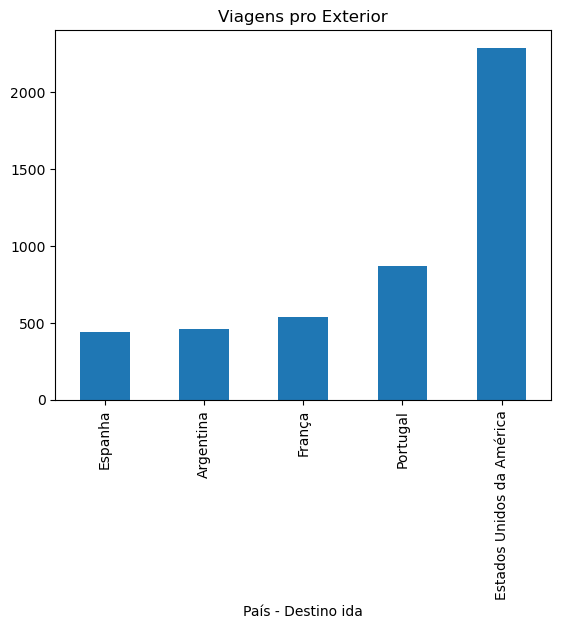

In [49]:
# Gráfico Países
grupado.plot.bar(sns.color_palette()).set(title='Viagens pro Exterior')